# Introduction

Nama : Gentur Sulistiyo Herlamabng

Objective : membuat model berdasarakan data yang aria berikan unutuk memprediksi target berdasarkan input dari 2 lab yang berbeda.

# Library Import

In [3]:
# data load and eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns


#preprocesing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


# Untuk Modeling
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE

import pickle

# Data Loading

In [4]:
#Load dataset
df=pd.read_excel(r'D:\Hack8 Data Science\Phase 2\Final\Aria\aria_data.xlsx')

In [5]:
# Membuat copy agar data asli aman
aria=df.copy()

In [6]:
#mengechek jenis data
aria.dtypes

target         float64
v1             float64
v2             float64
v3             float64
v4             float64
v5             float64
v6             float64
v7             float64
v8             float64
sample_type     object
dtype: object

In [7]:
# melihat 10 data pertama
aria.head(10)

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
5,4.88,268.722222,193.000000,364.944444,345.888889,405.444444,210.055556,650.666667,4493.944444,lab 1
6,4.55,255.866667,182.133333,359.466667,326.800000,389.466667,191.866667,632.266667,4386.733333,lab 1
7,4.74,248.933333,203.933333,365.200000,332.933333,390.933333,202.200000,664.000000,4646.200000,lab 1
8,4.72,269.000000,191.466667,381.200000,353.200000,403.533333,217.800000,714.533333,4751.466667,lab 1
9,4.72,268.266667,178.800000,370.000000,342.466667,384.533333,204.733333,690.333333,4255.200000,lab 1


# EDA

Pada bagian ini akan membaut EDA sederhana

In [8]:
# Membuat fungsi yang dapat melihat persebaran dan median
def plot_histogram_with_mean(data):
    

    for col in data.select_dtypes(include=[np.number]):

        n, bins, patches = plt.hist(data[col], bins=20, density=True, alpha=0.5)

        
        mean = np.mean(data[col])


        plt.axvline(x=mean, color='red')

        plt.title(f'Histogram for {col} with Mean Line')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.show()

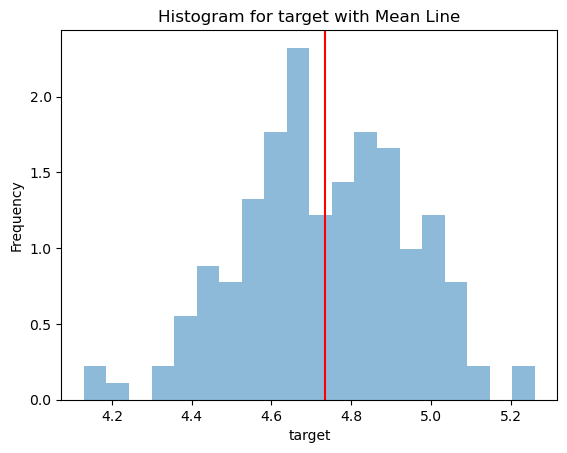

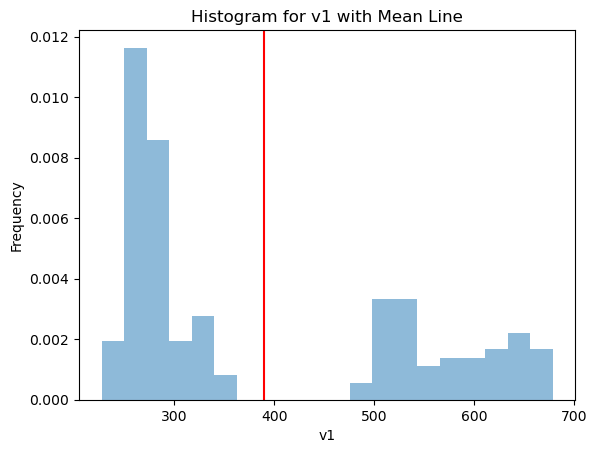

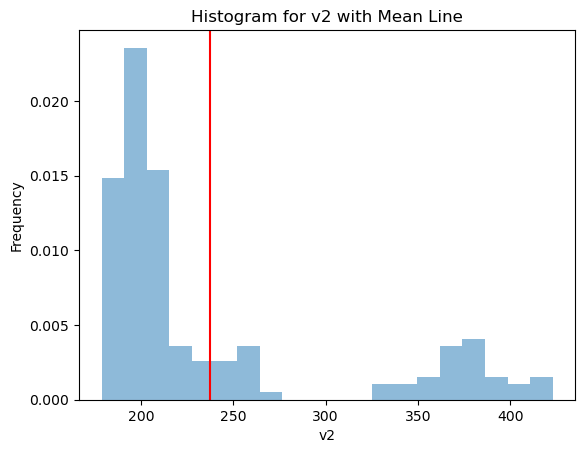

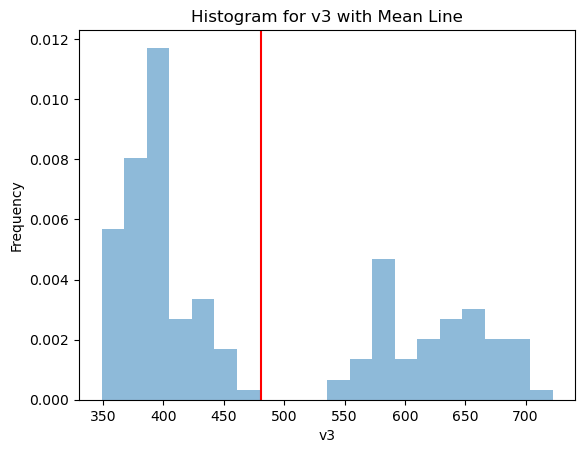

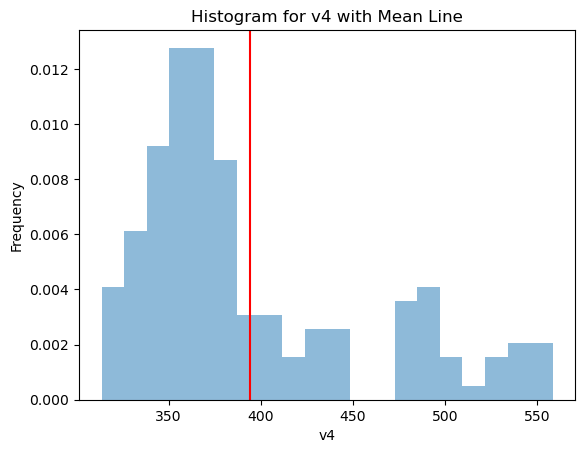

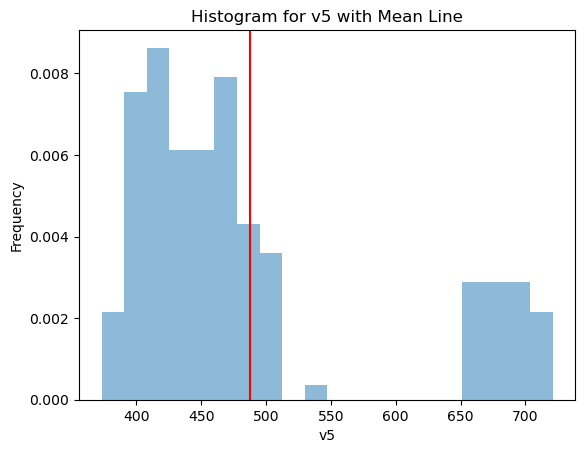

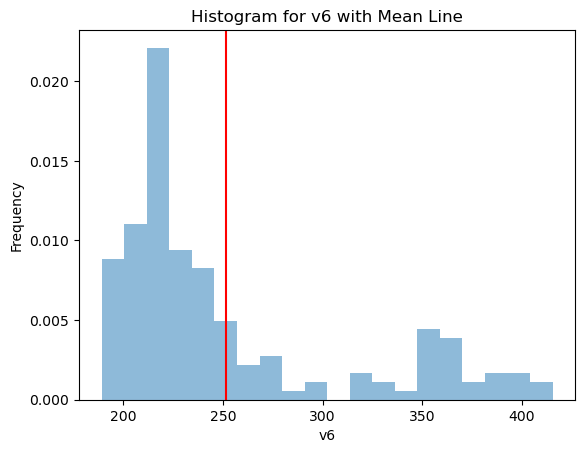

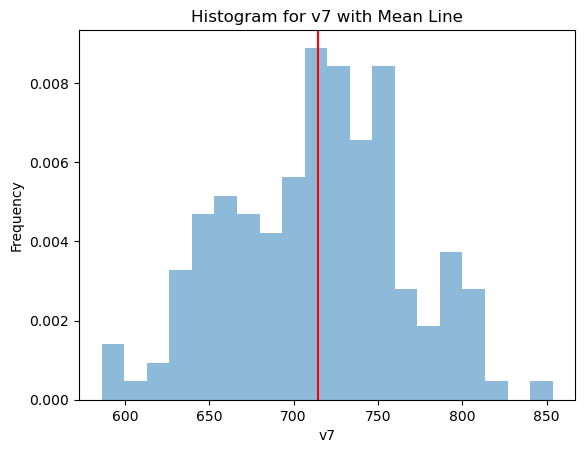

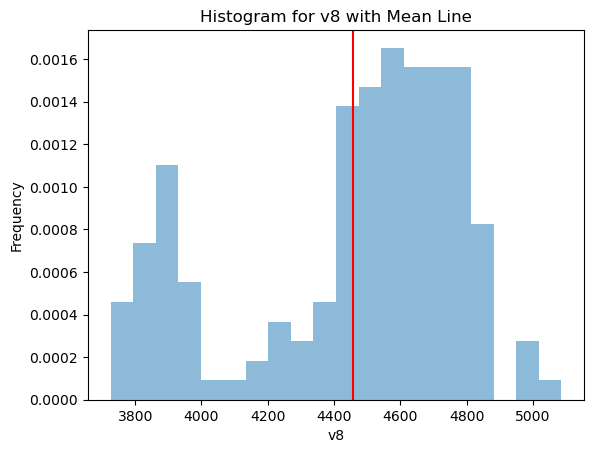

In [9]:
# melihat persebaran dan mean data
plot_histogram_with_mean(aria)

persebaran data cukup unik anatara v1 sampai v5 pesersbaranya berkumpul pada suatau cluster dan terdapat gap yang kososng diantaranyya ini mungkin di karenakan perbedaaan jenis tanaman yang di temukan aria di lapangan.

Dikarenakan nature aria sebagai persuahaan agriculture di data terdapat 2 jenis lab dimana data di input . Asumsi saya mungkin ada perbedaaan kalibrasi atau perbedaaan keadaaan lapanagan anatara lab 1 dan lab 2  maka dari itu  saya akan melihat hububgan korelasi fitur anatara semua data set dengan fitur yang di kumpulkan dari lab 1 dan lab 2 pakah terdapat perbedaan atau tidak.

In [10]:
# mengumpulkan data dari lab 1
aria1 = df[df['sample_type'] == 'lab 1'].copy()
aria1 = aria1.drop(["sample_type"], axis=1)

In [11]:
# mengumpulkan data dari lab 2
aria2 = df[df['sample_type'] == 'lab 2'].copy()
aria2 = aria2.drop(["sample_type"], axis=1)

Text(0.5, 1.0, 'Correlation Total')

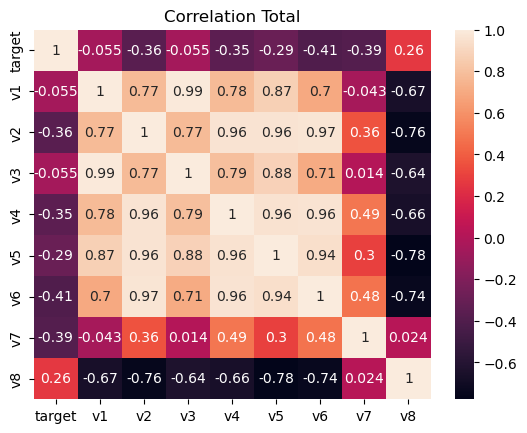

In [12]:
# melhiat korelasi anatara fitur dengan target dari semua dataset
sns.heatmap(aria.corr(), annot = True);
plt.title('Correlation Total')

korelasi fitur a\dengan target dari seluruh data hanya mennunjukan korelasi lemah pada fitur v1 dan v3 seddangkan sisaknya menunjukan angka korelasi fitur yang cukup baik.

Text(0.5, 1.0, 'Correlation Lab 1')

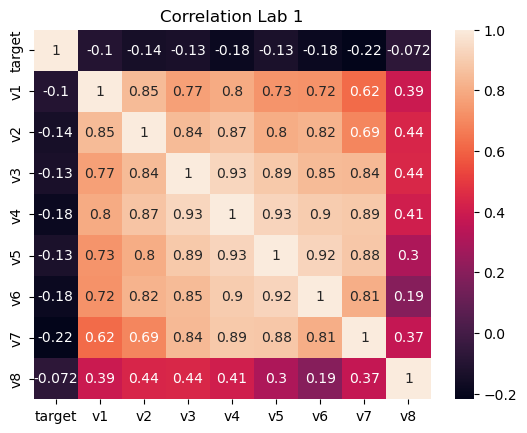

In [13]:
# melhiat korelasi anatara fitur dengan target dari semua data yang di dapat dari lab 1
sns.heatmap(aria1.corr(), annot = True);
plt.title('Correlation Lab 1')

berbeda dengan dengan korelasi dari semua dataset, korelasi dari data yang terkumpul dari lab 1 cukup seragam , meskipun begitu rata-rata niali korelasinya di bawah angka dari seluruh data.

Text(0.5, 1.0, 'Correlation Lab 2')

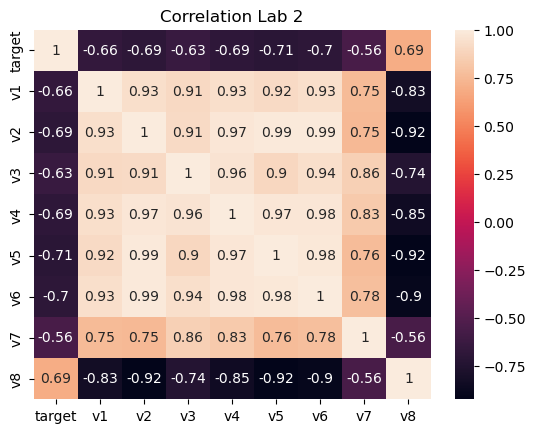

In [14]:
# melhiat korelasi anatara fitur dengan target dari semua data yang di dapat dari lab 2
sns.heatmap(aria2.corr(), annot = True);
plt.title('Correlation Lab 2')

hasil korelasi dari data yang di dapdat lab 2 meskipun seragam menunujukan angka yang jauh lebih tinngi korelasinya terhdapa target bila di bandingkan dengan nilai yang di dapat dari lab 1.

Di karenakan perbedan nilai korelasi dari lab 1 dan lab 2 yang cukup signifikan , dan saya tidak dapat bertanya langsung untuk memnanyakan dan memsatikannya maka saya akan menganggap data dari lab 1 dan lab 2 sebagai data yang terpisah dan akan di olah secara mandiri masing-masing.

In [15]:
# membuat funcition yang dapat melihat skew dari data
def check_skew(data):
  
    skewness = pd.DataFrame({'Skewness': skew(data, nan_policy='omit')}, index=data.columns)
    
    return skewness

In [16]:
aria1.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.72200,279.510776,204.956117,392.767375,364.830706,429.751532,228.122440,723.852851,4608.483351
std,0.18691,26.266814,21.892968,25.688558,31.142792,31.058798,24.568032,46.775823,203.773928
min,4.36000,227.285714,178.800000,348.933333,313.733333,373.333333,191.312500,620.875000,3961.625000
25%,4.61500,263.800000,190.903125,375.350000,342.366667,406.845486,212.859375,693.364583,4505.515625
50%,4.68000,273.479167,199.312500,389.437500,359.989583,423.477083,222.354167,726.443750,4629.093750
75%,4.86000,286.521875,207.437500,402.733333,378.983333,450.108333,241.366667,754.033333,4748.679167
max,5.26000,360.666667,265.437500,461.142857,443.200000,532.266667,319.333333,853.466667,5086.375000


In [17]:
aria2.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,4.753333,573.861872,291.586944,626.915819,442.907815,583.258166,290.331453,699.546385,4204.296371
std,0.253435,57.799382,87.631994,45.605583,72.212456,104.226482,78.175337,54.803097,359.153401
min,4.130000,482.562500,182.933333,547.866667,337.933333,457.866667,189.200000,586.266667,3725.666667
25%,4.577500,524.296875,206.500000,585.515625,373.140625,477.965625,213.562500,654.046875,3872.000000
50%,4.795000,562.414583,284.406250,628.425987,456.642857,583.533333,296.231250,706.968750,4089.900000
75%,4.955000,621.706250,376.416667,659.937500,497.484375,680.883333,361.815625,740.366667,4514.708333
max,5.110000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,806.857143,4836.571429


di sini terlihat meskipun data dari lab 1 dan lab 2 memiliki rata-rta nilai target yang sama , tetapi rata-rata nailai fiturnya jauh berbeda. contoh ini terlihat jelas dari vitur v1 dan v3 dimana mean v1 dari lab 1 adalah 279 sedangkan dari lab lab 2 573.

In [18]:
# membuat funcition yang dapat melihat skew dari data
def check_skew(data):
  
    skewness = pd.DataFrame({'Skewness': skew(data, nan_policy='omit')}, index=data.columns)
    
    return skewness

In [19]:
# check skew data lab 1
skewness = check_skew(aria1)
print(skewness)

        Skewness
target  0.398276
v1      1.049771
v2      1.392991
v3      0.721322
v4      0.764171
v5      0.733619
v6      1.066024
v7      0.061659
v8     -0.707422


In [20]:
# check skew data lab 2
skewness = check_skew(aria2)
print(skewness)

        Skewness
target -0.630968
v1      0.269972
v2      0.067326
v3      0.077697
v4      0.076671
v5      0.017159
v6      0.051813
v7     -0.060989
v8      0.214463


# Aria total

In [49]:
ariaT = aria.drop(["sample_type"], axis=1)

In [51]:
# pendefinisian fitur dan target
Xt=ariaT.drop(["target"], axis=1)
yt=ariaT['target']

In [52]:
# train test split
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2, random_state=36)
print('Train Size : ', Xt_train.shape)
print('Test Size  : ', Xt_test.shape)

Train Size :  (128, 8)
Test Size  :  (32, 8)


In [54]:
# hyperparam tuning for lab 1
modelst = [
    {
        'name': 'LinearRegression',
        'estimator': LinearRegression(),
        'hyperparameters': {}
    },
    {
        'name': 'SVR',
        'estimator': SVR(),
        'hyperparameters': {
            'kernel': ['linear', 'rbf'],
            'C': [int(x) for x in np.linspace(0, 10, 100)],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'name': 'RandomForestRegressor',
        'estimator': RandomForestRegressor(),
        'hyperparameters': {
            'n_estimators': [int(x) for x in np.linspace(10, 100, 10)],
            'max_depth': [None, 5, 10,20 ]
        }
    },
    {
        'name': 'ElasticNet',
        'estimator': ElasticNet(),
        'hyperparameters': {
            'alpha': [int(x) for x in np.linspace(0.1, 10, 100)],
            'l1_ratio': [0,0.1, 0.5, 0.9,1]
        }
    },
    {
        'name': 'GaussianProcessRegressor',
        'estimator': GaussianProcessRegressor(),
        'hyperparameters': {
            'kernel': [ConstantKernel(1.0) * RBF(length_scale=1.0)],
            'alpha': [1e-10, 1e-5, 1e-1]
        }
    }
]

In [55]:
def grid_search_models(X, y, models):
    results = []
    for model in models:
        print("Running GridSearchCV for", model['name'])
        grid = GridSearchCV(model['estimator'], model['hyperparameters'], cv=4, scoring='neg_mean_absolute_error')
        grid.fit(X, y)
        result = {
            'name': model['name'],
            'best_params': grid.best_params_,
            'best_score': grid.best_score_
        }
        results.append(result)
    return results

In [56]:
results = grid_search_models(Xt_train, yt_train, modelst)

Running GridSearchCV for LinearRegression
Running GridSearchCV for SVR


c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libs

Running GridSearchCV for RandomForestRegressor
Running GridSearchCV for ElasticNet


c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+00, tolerance: 4.648e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model

Running GridSearchCV for GaussianProcessRegressor


In [57]:
# hyperparam evaluation
for result in results:
    print("Best parameters for", result['name'], ":", result['best_params'])
    print("Best MAE score for", result['name'], ":", result['best_score'])
    print("")

Best parameters for LinearRegression : {}
Best MAE score for LinearRegression : -0.16537505657508214

Best parameters for SVR : {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}
Best MAE score for SVR : -0.15965340958518132

Best parameters for RandomForestRegressor : {'max_depth': None, 'n_estimators': 50}
Best MAE score for RandomForestRegressor : -0.15949843749999998

Best parameters for ElasticNet : {'alpha': 2, 'l1_ratio': 0.1}
Best MAE score for ElasticNet : -0.1612924336589671

Best parameters for GaussianProcessRegressor : {'alpha': 1e-10, 'kernel': 1**2 * RBF(length_scale=1)}
Best MAE score for GaussianProcessRegressor : -4.731406250000001



hasil model terbaik unutk kesulurahan data adalah svr dengan c=7, kernel=rbf, dan gamma=scale.

In [58]:
# scaling train-test
skaler=StandardScaler()
skaler.fit_transform(Xt_train)
skaler.transform(Xt_test)

array([[-6.84627495e-01, -5.47799930e-01, -5.90011409e-01,
        -1.79472722e-02, -2.47915728e-01, -2.36649318e-01,
         1.73344539e+00,  1.46822098e-01],
       [-4.01947018e-01,  3.02627092e-01, -3.46115020e-01,
         4.66855342e-01,  3.65286197e-02,  6.13761133e-01,
         1.51953470e+00,  1.22084953e+00],
       [-8.40532548e-01, -6.50674167e-01, -8.34943451e-01,
        -6.05470440e-01, -6.46977947e-01, -4.54548082e-01,
         3.96503572e-01,  5.39327380e-01],
       [-9.09376937e-01, -6.42387075e-01, -8.29696140e-01,
        -5.92670371e-01, -7.60075580e-01, -6.26445995e-01,
         2.97731931e-01,  2.27932707e-01],
       [ 1.51814679e+00,  1.93907043e+00,  1.38522138e+00,
         1.64580570e+00,  2.16518050e+00,  1.81079203e+00,
         1.55008180e+00, -1.66695982e+00],
       [-9.42199053e-01, -5.23510180e-01, -8.27486746e-01,
        -4.32925510e-01, -6.57019512e-01, -3.06861142e-01,
        -1.23607310e-01,  2.19734661e-01],
       [-9.58692167e-01, -5.092220

In [63]:
# model definitiion
modelt=SVR(kernel='rbf',C=7,gamma='scale')

In [64]:
# model training
modelt.fit(Xt_train,yt_train)

SVR(C=7)

In [65]:
# model predict
yt_pred_train = modelt.predict(Xt_train)
yt_pred_test = modelt.predict(Xt_test)

In [66]:
# model evaluation
print('MAE - Train Set : ', MAE(yt_train, yt_pred_train)) 
print('MAE - Test Set  : ', MAE(yt_test, yt_pred_test))

MAE - Train Set :  0.1563278187808523
MAE - Test Set  :  0.12190731110155426


Niali MAE adalah nilai error maksimal yang di dpaat antara nilai prediksi dengan nilai aslinya, sehingga mae 0.12 model memiliki Range error 0.12 dari target aslinya

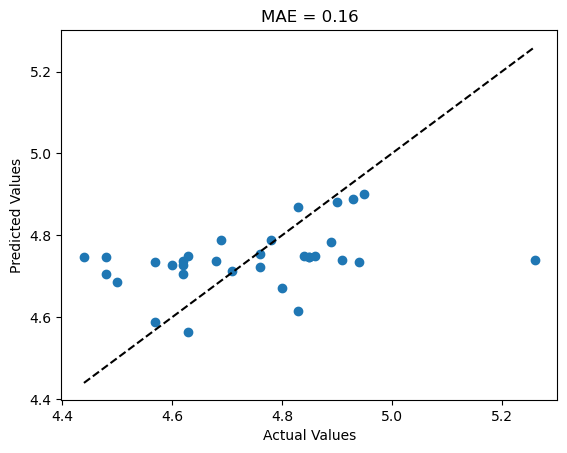

In [67]:
#visualisasi
visualt= MAE(yt_train, yt_pred_train)
plt.scatter(yt_test, yt_pred_test)
plt.plot([min(yt_test), max(yt_test)], [min(yt_test), max(yt_test)], 'k--' )
plt.title('MAE = {:.2f}'.format(visualt))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Nialai error yang di daptkan untuk model yang menggunakan seluruh dataset adalah 0.16 menurut saya ini cukup baik karena nilai errro nya kurang dari 5% dari niali rat-rata target , tetapi apakah denggan memisahkan model dari data lab 1 dan lab 2 dapat meningkatakan performanya?


# Aria Lab 1

In [21]:
# pendefinisian fitur dan target
X1=aria1.drop(["target"], axis=1)
y1=aria1['target']

In [22]:
# train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=36)
print('Train Size : ', X1_train.shape)
print('Test Size  : ', X1_test.shape)

Train Size :  (80, 8)
Test Size  :  (20, 8)


In [23]:
# hyperparam tuning for lab 1
models1 = [
    {
        'name': 'LinearRegression',
        'estimator': LinearRegression(),
        'hyperparameters': {}
    },
    {
        'name': 'SVR',
        'estimator': SVR(),
        'hyperparameters': {
            'kernel': ['linear', 'rbf'],
            'C': [int(x) for x in np.linspace(0, 10, 100)],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'name': 'RandomForestRegressor',
        'estimator': RandomForestRegressor(),
        'hyperparameters': {
            'n_estimators': [int(x) for x in np.linspace(10, 100, 10)],
            'max_depth': [None, 5, 10,20 ]
        }
    },
    {
        'name': 'ElasticNet',
        'estimator': ElasticNet(),
        'hyperparameters': {
            'alpha': [int(x) for x in np.linspace(0.1, 10, 100)],
            'l1_ratio': [0,0.1, 0.5, 0.9,1]
        }
    },
    {
        'name': 'GaussianProcessRegressor',
        'estimator': GaussianProcessRegressor(),
        'hyperparameters': {
            'kernel': [ConstantKernel(1.0) * RBF(length_scale=1.0)],
            'alpha': [1e-10, 1e-5, 1e-1]
        }
    }
]

In [24]:
def grid_search_models(X, y, models):
    results = []
    for model in models:
        print("Running GridSearchCV for", model['name'])
        grid = GridSearchCV(model['estimator'], model['hyperparameters'], cv=4, scoring='neg_mean_absolute_error')
        grid.fit(X, y)
        result = {
            'name': model['name'],
            'best_params': grid.best_params_,
            'best_score': grid.best_score_
        }
        results.append(result)
    return results


In [25]:
# hyperparam train
results = grid_search_models(X1_train, y1_train, models1)

Running GridSearchCV for LinearRegression
Running GridSearchCV for SVR


c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libs

Running GridSearchCV for RandomForestRegressor
Running GridSearchCV for ElasticNet


c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.496e-01, tolerance: 2.047e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model

Running GridSearchCV for GaussianProcessRegressor


In [26]:
# hyperparam evaluation
for result in results:
    print("Best parameters for", result['name'], ":", result['best_params'])
    print("Best MAE score for", result['name'], ":", result['best_score'])
    print("")

Best parameters for LinearRegression : {}
Best MAE score for LinearRegression : -0.17480740173624043

Best parameters for SVR : {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best MAE score for SVR : -0.15214751192902184

Best parameters for RandomForestRegressor : {'max_depth': 10, 'n_estimators': 30}
Best MAE score for RandomForestRegressor : -0.15158691798941787

Best parameters for ElasticNet : {'alpha': 4, 'l1_ratio': 0.9}
Best MAE score for ElasticNet : -0.15022916666666652

Best parameters for GaussianProcessRegressor : {'alpha': 1e-10, 'kernel': 1**2 * RBF(length_scale=1)}
Best MAE score for GaussianProcessRegressor : -4.7135



Hasil model untuk data dari lab 1 yang terbaik adalah elasticnet dengan alpha= 4 , dan lratio=0.9

In [27]:
# scaling train-test
skaler=StandardScaler()
skaler.fit_transform(X1_train)
skaler.transform(X1_test)

array([[-1.03528804, -0.80245706, -0.75891554, -0.53645262, -0.01139966,
        -0.37049709,  0.05660167, -0.18467687],
       [-0.16814794, -0.13623299, -0.52890597, -0.78685286, -0.50425474,
        -0.4511406 , -0.44817068, -0.39871718],
       [-1.25146455, -0.023942  , -0.73669693, -0.36720775, -0.36289321,
        -0.27730904, -1.01430237, -1.14807443],
       [-0.02666718, -0.82394816, -1.26587542, -1.16630553, -1.0238539 ,
        -0.34361592, -1.17582952, -1.04979503],
       [-0.63320887, -0.50247714, -0.18592571, -0.22955182, -0.49941534,
        -0.53276161,  0.04576327, -0.4710523 ],
       [-1.14482153, -0.40218534, -0.21440308, -0.27064314, -0.28457128,
        -0.37049709,  0.05660167,  0.63349449],
       [-0.08827977,  0.11897381,  0.02968871,  0.17044651, -0.32468739,
        -0.13101031,  0.60201803,  0.01515584],
       [ 0.60543231, -0.73261099, -0.46553599, -0.10114144, -0.34952117,
        -0.399822  , -0.65401291,  0.89973221],
       [-0.10501405, -0.65434757

In [61]:
# model definitiion
model1=ElasticNet(alpha=4,l1_ratio=0.9)

In [29]:
# model training
model1.fit(X1_train,y1_train)

ElasticNet(alpha=4, l1_ratio=0.9)

In [30]:
# model predict
y1_pred_train = model1.predict(X1_train)
y1_pred_test = model1.predict(X1_test)

In [46]:
# model evaluation
print('MAE - Train Set : ', MAE(y1_train, y1_pred_train)) 
print('MAE - Test Set  : ', MAE(y1_test, y1_pred_test))

MAE - Train Set :  0.14877500000000005
MAE - Test Set  :  0.1616499999999999


Niali MAE adalah nilai error maksimal yang di dpaat antara nilai prediksi dengan nilai aslinya, sehingga mae 0.16 model memiliki Range error 0.16 dari target aslinya

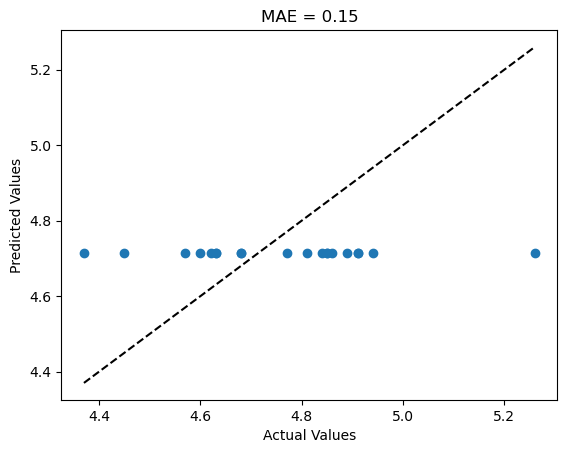

In [32]:
#visualisasi
visual1= MAE(y1_train, y1_pred_train)
plt.scatter(y1_test, y1_pred_test)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], 'k--' )
plt.title('MAE = {:.2f}'.format(visual1))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Terlihat peningkataperforma dimana niali mae turun dari 0.16 yang di seluruh data menjadi 0.15 di data yang hanya mengalisa lab 1 saja. di sini terlihat data test unutuk lab 1 rata-rata terkumpul pada range sekitar 4.6-4.9 dan rata model mempredik di sekitar 4.7

# Aria Lab 2

In [33]:
# pendefinisian fitur dan target
X2=aria2.drop(["target"], axis=1)
y2=aria2['target']

In [34]:
# train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=36)
print('Train Size : ', X2_train.shape)
print('Test Size  : ', X2_test.shape)

Train Size :  (48, 8)
Test Size  :  (12, 8)


In [35]:
# hyperparam tuning for lab 2
models2 = [
    {
        'name': 'LinearRegression',
        'estimator': LinearRegression(),
        'hyperparameters': {}
    },
    {
        'name': 'SVR',
        'estimator': SVR(),
        'hyperparameters': {
            'kernel': ['linear', 'rbf'],
            'C': [int(x) for x in np.linspace(0, 10, 100)],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'name': 'RandomForestRegressor',
        'estimator': RandomForestRegressor(),
        'hyperparameters': {
            'n_estimators': [int(x) for x in np.linspace(10, 100, 10)],
            'max_depth': [None, 5, 10,20 ]
        }
    },
    {
        'name': 'ElasticNet',
        'estimator': ElasticNet(),
        'hyperparameters': {
            'alpha': [int(x) for x in np.linspace(0.1, 10, 100)],
            'l1_ratio': [0,0.1, 0.5, 0.9,1]
        }
    },
    {
        'name': 'GaussianProcessRegressor',
        'estimator': GaussianProcessRegressor(),
        'hyperparameters': {
            'kernel': [ConstantKernel(1.0) * RBF(length_scale=1.0)],
            'alpha': [1e-10, 1e-5, 1e-1]
        }
    }
]

In [36]:
def grid_search_models(X, y, models):
    results = []
    for model in models:
        print("Running GridSearchCV for", model['name'])
        grid = GridSearchCV(model['estimator'], model['hyperparameters'], cv=4, scoring='neg_mean_absolute_error')
        grid.fit(X, y)
        result = {
            'name': model['name'],
            'best_params': grid.best_params_,
            'best_score': grid.best_score_
        }
        results.append(result)
    return results


In [37]:
# hyperparam train
results = grid_search_models(X2_train, y2_train, models2)

Running GridSearchCV for LinearRegression
Running GridSearchCV for SVR


c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libs

Running GridSearchCV for RandomForestRegressor
Running GridSearchCV for ElasticNet


c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Gentur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.743e-01, tolerance: 2.351e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model

Running GridSearchCV for GaussianProcessRegressor


In [38]:
# hyperparam evaluation
for result in results:
    print("Best parameters for", result['name'], ":", result['best_params'])
    print("Best MAE score for", result['name'], ":", result['best_score'])
    print("")

Best parameters for LinearRegression : {}
Best MAE score for LinearRegression : -0.16588873454128816

Best parameters for SVR : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best MAE score for SVR : -0.14545318469288115

Best parameters for RandomForestRegressor : {'max_depth': 10, 'n_estimators': 40}
Best MAE score for RandomForestRegressor : -0.14726249999999974

Best parameters for ElasticNet : {'alpha': 3, 'l1_ratio': 0.5}
Best MAE score for ElasticNet : -0.15113515898480992

Best parameters for GaussianProcessRegressor : {'alpha': 1e-10, 'kernel': 1**2 * RBF(length_scale=1)}
Best MAE score for GaussianProcessRegressor : -4.7425



hasil model terbaik untuk ada dari lab 2 adalah model svr yang menggunakan kernel rbf , c=10 , dan gama scale.

In [39]:
# scaling train-test
skaler=StandardScaler()
skaler.fit_transform(X2_train)
skaler.transform(X2_test)

array([[-0.00482425,  0.65830235,  0.42995809,  0.70457609,  0.93181862,
         0.70640552,  0.31726268, -0.86466599],
       [-0.03788512,  0.78266916,  0.31820336,  0.62814659,  0.80716585,
         0.82080842,  0.20005345, -0.75289969],
       [ 1.60470295,  0.97233327,  1.40982357,  1.34747299,  1.19092921,
         1.02817695,  1.64497472, -1.35673779],
       [-1.17594179, -1.00003194, -0.635288  , -1.00046858, -1.02344563,
        -0.98040057, -1.15192189,  1.06051873],
       [-0.50412807, -0.6518426 , -0.33489128, -0.61062684, -0.7377328 ,
        -0.36673193, -0.29624129,  0.57687125],
       [ 0.6561811 ,  0.86334718,  0.47108383,  0.76835283,  0.92108932,
         0.74121456,  0.11334449, -0.90263307],
       [-0.38332876, -0.9094461 , -1.14757168, -1.06031271, -1.13194417,
        -1.13481265, -0.91917677,  0.5893346 ],
       [ 0.31073746,  0.99073352,  0.18946191,  0.61703268,  0.86503174,
         0.98795552, -0.21865959, -1.04959682],
       [-0.92056781, -1.01560138

In [40]:
# model definitiion
model2=SVR(kernel='rbf',C=10,gamma='scale')

In [41]:
# model training
model2.fit(X2_train,y2_train)

SVR(C=10)

In [42]:
# model predict
y2_pred_train = model2.predict(X2_train)
y2_pred_test = model2.predict(X2_test)

In [47]:
# model evaluation
print('MAE - Train Set : ', MAE(y2_train, y2_pred_train)) 
print('MAE - Test Set  : ', MAE(y2_test, y2_pred_test))

MAE - Train Set :  0.14068071801302343
MAE - Test Set  :  0.12705627937176334


Niali MAE adalah nilai error maksimal yang di dpaat antara nilai prediksi dengan nilai aslinya, sehingga mae 0.12 model memiliki Range error 0.12 dari target aslinya

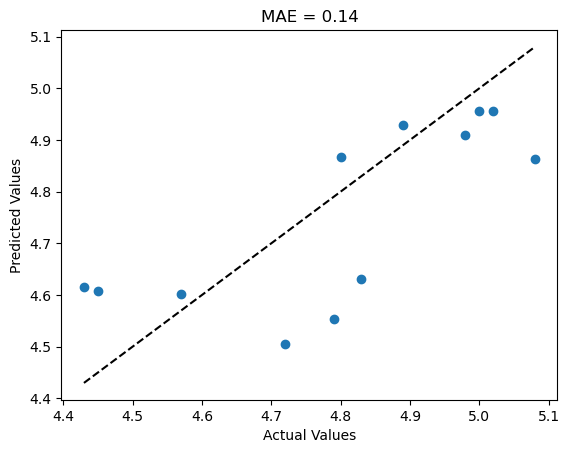

In [44]:
# Visualisasi
visual2= MAE(y2_train, y2_pred_train)
plt.scatter(y2_test, y2_pred_test)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], 'k--')
plt.title('MAE = {:.2f}'.format(visual2))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Terlihat peningkataperforma dimana niali mae turun dari 0.16 yang di seluruh data menjadi 0.14 di data yang hanya mengalisa lab 2 saja, terlihat di sini persebaran target untik data lab 2 lebih bervariasi di bandingkan data dari lab 1

# Model Saving

In [45]:
# model saving
with open("model1.pkl", "wb") as file_1:
    pickle.dump(model1, file_1)

with open("model2.pkl", "wb") as file_2:
    pickle.dump(model2, file_2)


with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(skaler, file_3)

# Model Deployment

untuk mencoba model yang saya gunakan dapat menggunakan link ini(https://huggingface.co/spaces/Gentur/aria_prediction)

# Evaluation

Dari data yang di dapatkan terdapat persebaran data yang cukup beragam khususnya unutk v1 sampai v5 di karenakan persebaran datanya ternagai menjadi dua cluster .dan sedangkan unutk dayta yang di dapatterdapat perbedaan yang  cukup menari unutuk data yang di dapat dari lab 1 dan 2. meskupiub kedua data meiliki nilait rata-rata target yang sama yaitu sekitar 4.7 tetapi nili standart deviasi dari lab 1 lebih rendah yaitu 0.186 di bandingkan data dari lab 2 sebesar 0.253 ini menunujukan bahwa varirasi target di lab2 jauh lebih beragam apa bila di banidngkan dengan data dari lab 1. Selain itu juga meskipun kedua data memiliki nilai rata-rata target yang sama tetapi nilai rata-rat dari fitur anatara kedua lab cukup berbeda ini dapat di pisisahkan.

sedangkan untuk model, model yang menggunakan kesulrahan data memiliki niali error sebesar 0.16 , akan tetapi model yang di pisah anatara data dari lab 1 dan lab 2 memilki tingakat performa yang lebih tinggi yaitu 0.15 unutk model lab 1 dan 0.14 unutk model lab 2





  